
Выполнение первого задания:

Кол-во пустых строк ->:  0

Первые 5 строк таблицы:
    Gender  Income  Children  Cars  Age
0       1   40000         1     0   42
1       0   30000         3     1   43
2       0   80000         5     2   60
3       0   70000         0     1   41
4       0   30000         0     0   36

Выполнение второго задания:
Результат кластеризации представлен на диаграммах.


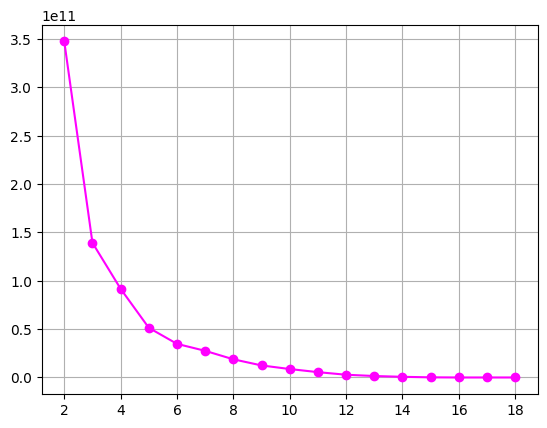

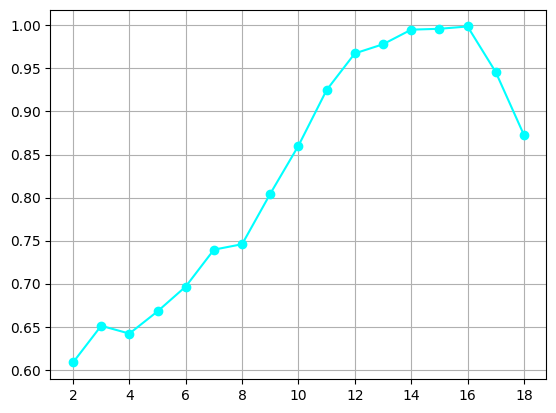


Координаты центров кластеров:
 [[5.12195122e-01 7.00000000e+04 2.68292683e+00 1.47967480e+00
  4.64308943e+01]
 [5.00000000e-01 3.00000000e+04 1.25373134e+00 1.17164179e+00
  4.15447761e+01]
 [4.11764706e-01 1.20000000e+05 1.94117647e+00 3.29411765e+00
  4.58823529e+01]
 [5.67567568e-01 1.00000000e+04 1.52702703e+00 1.02702703e+00
  4.15810811e+01]
 [4.51807229e-01 6.00000000e+04 1.92771084e+00 1.25903614e+00
  4.51746988e+01]
 [5.00000000e-01 9.00000000e+04 3.02631579e+00 1.63157895e+00
  4.80263158e+01]
 [4.83660131e-01 4.00000000e+04 1.30718954e+00 1.13725490e+00
  4.17777778e+01]
 [2.50000000e-01 1.50000000e+05 1.50000000e+00 3.50000000e+00
  4.50000000e+01]
 [5.45454545e-01 2.00000000e+04 1.37662338e+00 1.12987013e+00
  4.35844156e+01]
 [5.31250000e-01 1.30000000e+05 2.09375000e+00 2.93750000e+00
  4.88437500e+01]
 [5.05494505e-01 8.00000000e+04 3.02197802e+00 1.70329670e+00
  4.61538462e+01]
 [4.50000000e-01 5.00000000e+04 1.62500000e+00 8.75000000e-01
  4.23000000e+01]
 [4.1379


Выполнение третьего задания:
Результат иерархической кластеризации данных представлен на трехмерной диаграмме.

Оптимальное кол-во кластеров при иерархической кластеризации:
2     166
0     153
1     134
3     123
8      91
4      77
9      74
5      40
6      38
10     32
12     29
11     17
13     16
14      4
15      3
7       3
Name: Cluster, dtype: int64



Выполнение четвертого задания:
Результат кластеризации данных с помощью алгоритма DBSCAN представлен на трехмерной диаграмме.

Оптимальное кол-во кластеров при кластеризации алгоритмом DBSCAN:
 7     166
 0     152
 1     134
 3     123
 2      91
 5      76
 4      74
 6      38
 11     32
 9      32
 8      28
 10     17
 12     16
-1      13
 13      8
Name: Cluster, dtype: int64



Выполнение пятого задания:
Результат сравнения быстродействия алгоритмов представлен на следующей таблице: 
Название алгоритма                   | Время работы
---------------------------------------------------------- 
Алгоритм k-means                     | 0.0666045 секунд
---------------------------------------------------------- 
Алгоритм иерархической кластеризации | 0.0350201 секунд
---------------------------------------------------------- 
Алгоритм DBSCAN                      | 0.0184712 секунд


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import time

# Датасет для работы берется из прошлой работы
data = pd.read_csv('bike_stats.csv', sep=',')
data=data.dropna()
data['Gender'].replace('Male',0,inplace=True)
data['Gender'].replace('Female',1,inplace=True)
data=data.drop(['ID', 'Marital Status', 'Education', 'Occupation','Home Owner','Commute Distance','Region','Purchased Bike'], axis=1)


# Переменные для замера времени работы алгоритмов
delta1 = delta2 = delta3 = 0


def task1():
    print('\nВыполнение первого задания:\n')
    print('Кол-во пустых строк ->: ',data.isna().sum().sum())


    print('\nПервые 5 строк таблицы:\n', data.head())


def task2():
    print('\nВыполнение второго задания:\n'
          'Результат кластеризации представлен на диаграммах.')

    models = []
    score1 = []
    score2 = []

    for i in range(2, 19):
        model = KMeans(n_clusters=i, random_state=123, init='k-means++').fit(data)
        models.append(model)
        score1.append(model.inertia_)
        score2.append(silhouette_score(data, model.labels_))

    plt.grid()
    plt.plot(np.arange(2, 19), score1, marker='o',color='magenta')
    plt.show()
    plt.grid()
    plt.plot(np.arange(2, 19), score2, marker='o',color='cyan')
    plt.show()

    start = time.perf_counter()

    model1 = KMeans(n_clusters=16, random_state=123, init='k-means++')
    model1.fit(data)

    global delta1
    delta1 = time.perf_counter() - start

    print('\nКоординаты центров кластеров:\n',
          model1.cluster_centers_)

    labels = model1.labels_
    data['Cluster'] = labels

    print('\nОптимальное кол-во кластеров при k-means кластеризации:\n',
          data['Cluster'].value_counts(), sep='')

    fig = go.Figure(data=[go.Scatter3d(x=data['Age'],
                                       y=data['Gender'],
                                       z=data['Income'],
                                       mode='markers',
                                       marker_color=data['Cluster'],
                                       marker_size=4)])
    fig.show()


def task3():
    print('\nВыполнение третьего задания:\n'
          'Результат иерархической кластеризации данных'
          ' представлен на трехмерной диаграмме.')

    start = time.perf_counter()

    model2 = AgglomerativeClustering(16, compute_distances=True)
    clustering = model2.fit(data)

    global delta2
    delta2 = time.perf_counter() - start

    data['Cluster'] = clustering.labels_
    print('\nОптимальное кол-во кластеров при иерархической кластеризации:\n',
          data['Cluster'].value_counts(), sep='')

    fig = go.Figure(data=[go.Scatter3d(x=data['Age'],
                                       y=data['Gender'],
                                       z=data['Income'],
                                       mode='markers',
                                       marker_color=data['Cluster'],
                                       marker_size=4)])
    fig.show()


def task4():
    print('\nВыполнение четвертого задания:\n'
          'Результат кластеризации данных с помощью алгоритма'
          ' DBSCAN представлен на трехмерной диаграмме.')

    start = time.perf_counter()

    model3 = DBSCAN(eps=11, min_samples=5).fit(data)
    data['Cluster'] = model3.labels_

    global delta3
    delta3 = time.perf_counter() - start

    print('\nОптимальное кол-во кластеров при '
          'кластеризации алгоритмом DBSCAN:\n',
          data['Cluster'].value_counts(), sep='')

    fig = go.Figure(
        data=[go.Scatter3d(x=data['Age'],
                                       y=data['Gender'],
                                       z=data['Income'],
                                       mode='markers',
                                       marker_color=data['Cluster'],
                                       marker_size=4)])
    fig.show()


def task5():
    print('\nВыполнение пятого задания:\n'
          'Результат сравнения быстродействия алгоритмов '
          'представлен на следующей таблице:',
          "\nНазвание алгоритма                   | Время работы\n"
          "----------------------------------------------------------",
          "\nАлгоритм k-means                     |", round(delta1, 10),
          "секунд\n----------------------------------------------------------",
          "\nАлгоритм иерархической кластеризации |", round(delta2, 10),
          "секунд\n----------------------------------------------------------",
          "\nАлгоритм DBSCAN                      |", round(delta3, 10), 'секунд')


task1()
task2()
task3()
task4()
task5()